# NN 실습 (sklearn datasets)
binary classfication

In [9]:
''' import '''
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt

In [ ]:
''' data '''
num_pts = 500

X, y = datasets.make_circles(n_samples=num_pts, noise=0.2, factor=0.3, random_state=123)

x_data = torch.Tensor(X)                # (500, 2) : batch dim x input dim  / torch.tensor <-> torch.Tensor
y_data = torch.Tensor(y.reshape(-1,1))  # (500, 1)

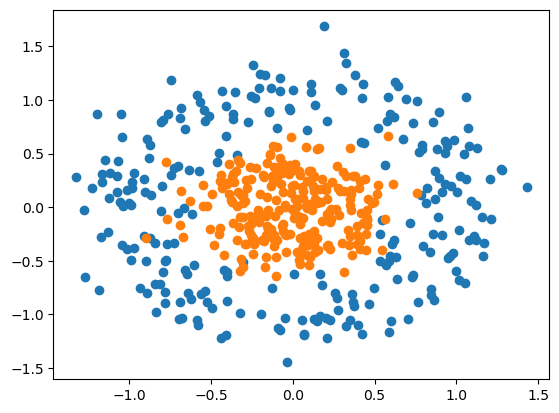

In [11]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
    plt.show()

scatter_plot()

In [ ]:
''' model '''
class Model(nn.Module):
    def __init__(self, input_size, h1, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, h1) # batch 고려 x
        self.linear2 = nn.Linear(h1, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    
    def predict(self, x):
        return 1 if self.forward(x) > 0.5 else 0

In [13]:
# model
model = Model(2,4,1)

# loss fn, optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
# loop
epoch = 2000
loss_list = []

for i in range(epoch):
    
    # forward
    y_pred = model(x_data)  # model.forward() 동일
    loss = criterion(y_pred, y_data)

    loss_list.append(loss.item())
    print(f'epoch {i:4}, loss {loss:.3f}')

    # backward
    optimizer.zero_grad()
    loss.backward()

    # step
    optimizer.step()

epoch    0, loss 0.695
epoch    1, loss 0.694
epoch    2, loss 0.694
epoch    3, loss 0.694
epoch    4, loss 0.694
epoch    5, loss 0.694
epoch    6, loss 0.694
epoch    7, loss 0.694
epoch    8, loss 0.694
epoch    9, loss 0.693
epoch   10, loss 0.693
epoch   11, loss 0.693
epoch   12, loss 0.693
epoch   13, loss 0.693
epoch   14, loss 0.693
epoch   15, loss 0.693
epoch   16, loss 0.693
epoch   17, loss 0.693
epoch   18, loss 0.693
epoch   19, loss 0.692
epoch   20, loss 0.692
epoch   21, loss 0.692
epoch   22, loss 0.692
epoch   23, loss 0.692
epoch   24, loss 0.692
epoch   25, loss 0.692
epoch   26, loss 0.691
epoch   27, loss 0.691
epoch   28, loss 0.691
epoch   29, loss 0.691
epoch   30, loss 0.691
epoch   31, loss 0.691
epoch   32, loss 0.691
epoch   33, loss 0.690
epoch   34, loss 0.690
epoch   35, loss 0.690
epoch   36, loss 0.690
epoch   37, loss 0.690
epoch   38, loss 0.689
epoch   39, loss 0.689
epoch   40, loss 0.689
epoch   41, loss 0.689
epoch   42, loss 0.688
epoch   43,

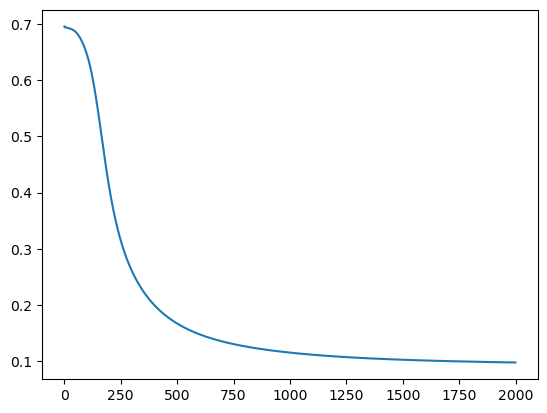

In [15]:
# plot loss
plt.plot(loss_list)
plt.show()

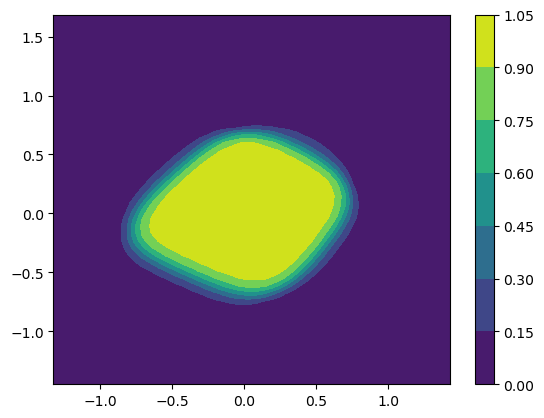

In [16]:
# plot desicion boundary
def plot_desicion_boundary():
    x_span = np.linspace(min(X[:,0]), max(X[:,0]))
    y_span = np.linspace(min(X[:,1]), max(X[:,1]))
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])  # np.c_[] : column 결합, np.r_[] : row 결합
    
    d_pred = model(grid)
    z = d_pred.reshape(xx.shape).detach().numpy() # detach, numpy 필수

    plt.contourf(xx, yy, z)
    plt.colorbar()
    plt.show()

plot_desicion_boundary()